In [31]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [32]:
data = pd.read_csv("target.csv")

In [33]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [34]:
data = data.dropna(how='any')

In [35]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int)

In [36]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [37]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [38]:
Y = data['res_type'].values.astype('int64')

In [39]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [40]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [41]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [42]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [44]:
model = Sequential()

In [45]:
model.add(Conv1D(filters=24*4,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(8,1), 
                 activation='relu'))

In [46]:
model.add(MaxPooling1D(pool_size=1))

In [47]:
model.add(Conv1D(filters=24*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [48]:
model.add(MaxPooling1D(pool_size=1))

In [49]:
model.add(Conv1D(filters=24*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [50]:
model.add(MaxPooling1D(pool_size=1))

In [51]:
model.add(Conv1D(filters=24,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [52]:
model.add(MaxPooling1D(pool_size=1))

In [53]:
model.add(Flatten())

In [54]:
model.add(Dense(8, activation='tanh'))

In [55]:
model.add(Dense(5,activation='softmax'))

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 8, 96)             192       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 8, 96)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 8, 72)             6984      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 8, 72)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 48)             3504      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 8, 48)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 8, 24)             1176      
__________

In [57]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [58]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 63043 samples, validate on 15761 samples
Epoch 1/30
63043/63043 [==============================] - 20s 321us/step - loss: 1.3869 - acc: 0.4344 - val_loss: 1.1593 - val_acc: 0.6518
Epoch 2/30
63043/63043 [==============================] - 16s 254us/step - loss: 0.9468 - acc: 0.7079 - val_loss: 0.7302 - val_acc: 0.8129
Epoch 3/30
63043/63043 [==============================] - 17s 267us/step - loss: 0.5536 - acc: 0.8710 - val_loss: 0.4176 - val_acc: 0.9166
Epoch 4/30
63043/63043 [==============================] - 17s 264us/step - loss: 0.3594 - acc: 0.9381 - val_loss: 0.3200 - val_acc: 0.9438
Epoch 5/30
63043/63043 [==============================] - 12s 185us/step - loss: 0.2800 - acc: 0.9626 - val_loss: 0.2529 - val_acc: 0.9649
Epoch 6/30
63043/63043 [==============================] - 11s 174us/step - loss: 0.2280 - acc: 0.9694 - val_loss: 0.2113 - val_acc: 0.9678
Epoch 7/30
63043/63043 [==============================] - 11s 175us/step - loss: 0.1948 - acc: 0.9694 - val_loss: 0.

In [59]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

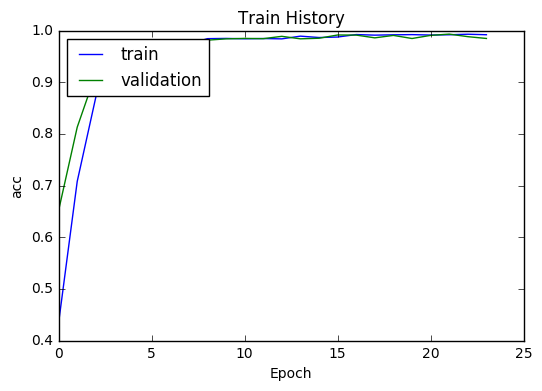

In [60]:
show_train_history(train_history,'acc','val_acc')

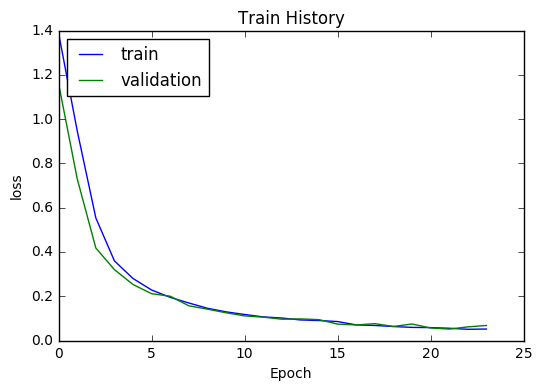

In [61]:
show_train_history(train_history,'loss','val_loss')

In [62]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 2s 86us/step


In [63]:
scores[1]

0.9825398436706934